In [16]:
from __future__ import division, print_function, unicode_literals

import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout = True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    
    plt.savefig(path, format = 'png', dpi = 300)

In [2]:
from sklearn.datasets import fetch_mldata
minist = fetch_mldata('MNIST original')
minist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [14]:
minist

{'COL_NAMES': ['label', 'data'],
 'DESCR': u'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [3]:
mnist = minist

In [4]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [18]:
y.shape

(70000,)

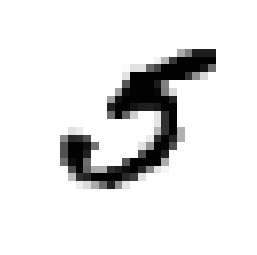

In [58]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,interpolation="nearest")

plt.axis("off")
plt.show()

In [21]:
y[36000]

5.0

In [89]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [23]:
X_train.shape

(60000, 784)

In [6]:
import numpy as np

y_train = Y_train
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# Binary classifier

In [8]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

/Users/lipenghua/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [10]:
some_digit = X[36000]
sgd_clf.predict([some_digit])

array([ True], dtype=bool)

In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, random_state = 42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(float(n_correct) / len(y_pred))

0.9653
0.96245
0.94585


In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy')

array([ 0.9653 ,  0.96245,  0.94585])

In [21]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y = None):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)

In [22]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy')

array([ 0.9107 ,  0.9095 ,  0.90875])

In [23]:
y_train_5

array([False, False, False, ..., False, False, False], dtype=bool)

In [24]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [25]:
y_train_pred

array([ True, False, False, ..., False, False, False], dtype=bool)

In [26]:
len(y_train_pred)

60000

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[54065,   514],
       [ 2014,  3407]])

In [29]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.86891099209385358

In [30]:
recall_score(y_train_5, y_train_pred)

0.6284818299206788

In [31]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.72939413401841147

In [32]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([ 209653.41003616])

In [33]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method = 'decision_function')

In [34]:
y_scores

array([  13952.39951518, -763769.38019515, -258753.73335114, ...,
       -822459.01927524, -289286.56568096, -229781.5930194 ])

In [35]:
y_scores.shape

(60000,)

In [36]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Saving figure precision_recall_vs_threshold_plot


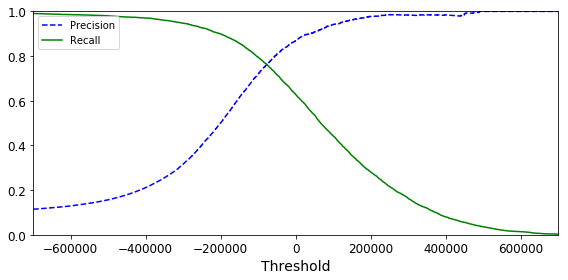

In [37]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label = 'Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label = 'Recall')
    plt.xlabel('Threshold')
    plt.legend(loc = 'upper left')
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
save_fig("precision_recall_vs_threshold_plot")
plt.show()

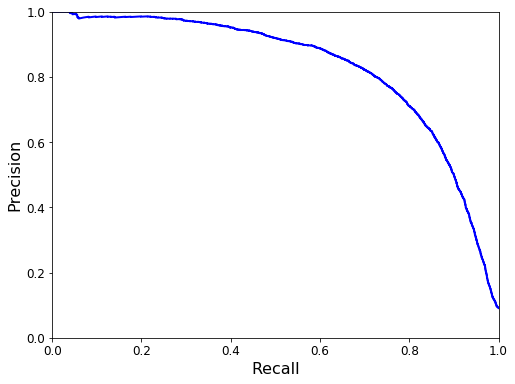

In [40]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, 'b-', linewidth = 2)
    plt.xlabel('Recall', fontsize = 16)
    plt.ylabel("Precision", fontsize = 16)
    plt.axis([0, 1, 0, 1])
    
plt.figure(figsize = (8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [41]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [42]:
thresholds

array([  964523.17461083,   490051.28557928,   489642.40405974, ...,
       -1794364.85579451, -1794552.49243223, -2891315.33813518])

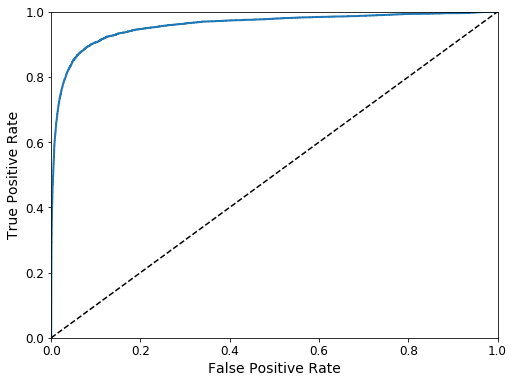

In [43]:
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plt.figure(figsize = (8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [44]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.95815652971282839

In [45]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3, method = 'predict_proba')

In [46]:
y_probas_forest

array([[ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       ..., 
       [ 1. ,  0. ],
       [ 0.9,  0.1],
       [ 1. ,  0. ]])

In [47]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

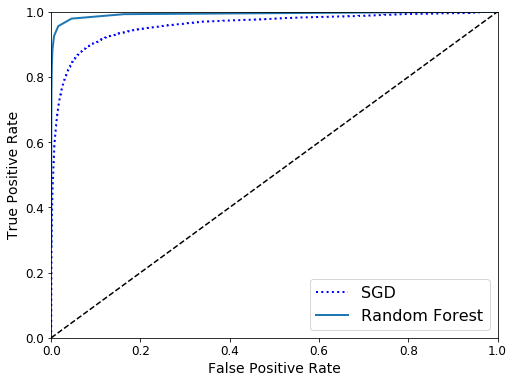

In [48]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [49]:
roc_auc_score(y_train_5, y_scores_forest)

0.99257810348130082

In [52]:
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

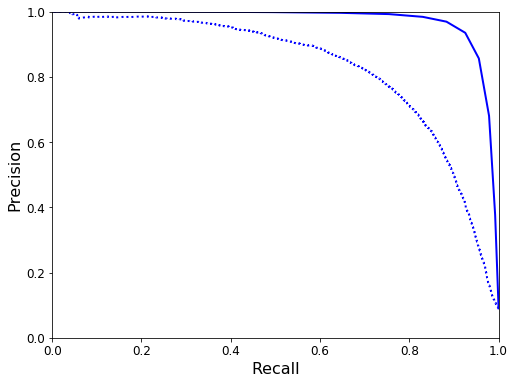

In [53]:
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, "b:", linewidth=2, label="SGD")
plot_precision_vs_recall(precisions_forest, recalls_forest)
plt.show()

In [77]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([ 5.])

In [55]:
y[36000]

5.0

In [60]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-364693.00652466, -171360.06821261, -159074.88239875,
         -44638.75552075,  -37888.90272892,  -86299.76553103,
        -224536.04632965, -152913.13073427, -143367.24350789,
         -40038.04420885]])

In [65]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state = 42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([ 5.])

In [63]:
len(ovo_clf.estimators_)

45

In [66]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([ 5.])

In [67]:
forest_clf.predict_proba([some_digit])

array([[ 0. ,  0. ,  0.1,  0.1,  0. ,  0.8,  0. ,  0. ,  0. ,  0. ]])

In [68]:
cross_val_score(sgd_clf, X_train, y_train, cv = 3, scoring = 'accuracy')

array([ 0.8684763,  0.840042 ,  0.8160224])

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv = 3, scoring = 'accuracy')

array([ 0.90776845,  0.9120456 ,  0.90988648])

In [70]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv = 3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5737,    3,   18,   10,   12,   47,   46,    8,   38,    4],
       [   1, 6434,   48,   24,    6,   47,    7,   11,  152,   12],
       [  51,   33, 5326,  106,   81,   31,   99,   53,  163,   15],
       [  51,   40,  129, 5345,    3,  238,   34,   59,  140,   92],
       [  19,   21,   35,    9, 5359,   11,   57,   27,   89,  215],
       [  71,   40,   34,  185,   76, 4614,  109,   25,  176,   91],
       [  37,   24,   38,    2,   40,  101, 5629,    6,   41,    0],
       [  22,   15,   74,   28,   54,   10,    5, 5796,   20,  241],
       [  52,  136,   71,  137,   12,  165,   58,   26, 5062,  132],
       [  44,   29,   24,   85,  164,   38,    3,  187,   83, 5292]])

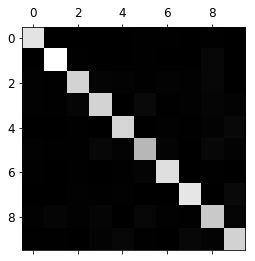

In [71]:
plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.show()

In [73]:
row_sums = conf_mx.sum(axis = 1, keepdims = True)
norm_conf_mx = conf_mx / row_sums

In [74]:
norm_conf_mx

array([[  9.68596995e-01,   5.06500084e-04,   3.03900051e-03,
          1.68833361e-03,   2.02600034e-03,   7.93516799e-03,
          7.76633463e-03,   1.35066689e-03,   6.41566774e-03,
          6.75333446e-04],
       [  1.48323939e-04,   9.54316227e-01,   7.11954910e-03,
          3.55977455e-03,   8.89943637e-04,   6.97122516e-03,
          1.03826758e-03,   1.63156333e-03,   2.25452388e-02,
          1.77988727e-03],
       [  8.55991944e-03,   5.53877140e-03,   8.93924136e-01,
          1.77912051e-02,   1.35951662e-02,   5.20308828e-03,
          1.66163142e-02,   8.89560255e-03,   2.73581739e-02,
          2.51762336e-03],
       [  8.31838199e-03,   6.52422117e-03,   2.10406133e-02,
          8.71799054e-01,   4.89316588e-04,   3.88191160e-02,
          5.54558800e-03,   9.62322623e-03,   2.28347741e-02,
          1.50057087e-02],
       [  3.25231085e-03,   3.59465936e-03,   5.99109894e-03,
          1.54056830e-03,   9.17322835e-01,   1.88291681e-03,
          9.75693256e-03

In [75]:
np.fill_diagonal(norm_conf_mx, 0)

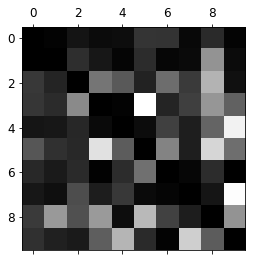

In [76]:
plt.matshow(norm_conf_mx, cmap = plt.cm.gray)
plt.show()

# Multilbale classification

In [79]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [80]:
knn_clf.predict([some_digit])

array([[False,  True]], dtype=bool)

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv = 3)
f1_score(y_train, y_train_knn_predict, average = 'macro')

# Multioutput classification

In [93]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

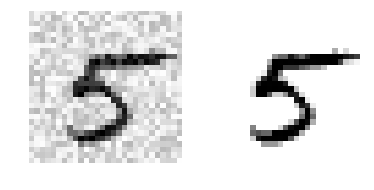

In [97]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    
some_index = 5500
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()

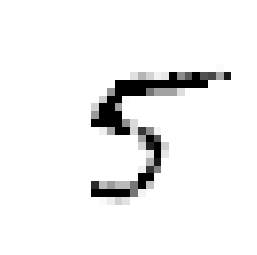

In [98]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

In [95]:
X_test_mod[some_index]

array([ 51,  15,  29,  48,  66,   2,  61,  20,  11,  95,  84,  16,  44,
        40,  84,   1,  16,  37,  67,  45,  82,  87,  41,  70,  55,   7,
         6,  54,  52,  17,  78,  16,  97,  84,  29,   0,  77,   8,  18,
        71,  30,  87,   0,  35,  65,  88,  26,  92,  24,  11,  16,  14,
        94,  81,  13,  81,  62,  79,  40,  76,  69,  36,  62,  43,   6,
        97,   9,  46,  89,  38,  85,  17,   7,   7,  43,  19,  91,  19,
        96,  69,  92,  77,  35,  55,   5,   6,  56,  69,  90,  34,  98,
        70,   7,  66,  93,  80,  72,  20,   6,  28,  31,  11,  17,  47,
        62,  11,  94,  84,  11,  83,  40,  40,  57,  96,  85,  32,   6,
        35,  77,  43,  46,  35,  75,  11,  32,  35,  73,  92,  77,  37,
         9,  10,  76,  41,  63,  35,  25,   8,  11,  82,  62,  68,  97,
        44,  96,  25,  40,  89,   5,  37,  82,  83,  28,  84,  62,  74,
        39,  37,  82,  49,  20,  41,  24,  10,  49,  84,  65,  54,  16,
         4,  16,  14,   4,  42,  97,  22,  15,  28,  38,  91,  2

In [1]:
print "test"

test
